## 学生消费画像

In [1]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
student_info=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\2_student_info.csv")
consumption=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\7_consumption.csv")

In [2]:
# 当前在校学生信息
student_info.columns=[u'学生id',u'学生姓名',u'性别',u'民族',u'出生日期',u'班级名',u'家庭住址',u'家庭类型',u'政治面貌',u'班级id',u'班级学期',u'是否住校',u'是否退学',u'宿舍号']
# student_info['是否退学'].fillna(value=0) #将NaN替换为0
#print(student_info.dtypes) # 查看dataframe中的数据类型
n_student=student_info['学生id'].unique().shape[0]
n_class=student_info['班级名'].unique().shape[0]
n_term=student_info['班级学期'].unique().shape[0]
print("学生信息_学生数量：",n_student)
print('学生信息_班级数量：',n_class)
print('学生信息_学期数量：',n_term)
print('学生信息_学期分布：',student_info['班级学期'].unique())
print("学生信息_是否退学：",student_info['是否退学'].unique())
student_info.head(5)

学生信息_学生数量： 1765
学生信息_班级数量： 46
学生信息_学期数量： 1
学生信息_学期分布： ['2018-2019-1']
学生信息_是否退学： [nan '1' ' ']


,学生id,学生姓名,性别,民族,出生日期,班级名,家庭住址,家庭类型,政治面貌,班级id,班级学期,是否住校,是否退学,宿舍号
0,14454,陈某某,女,汉族,2001.0,白-高二(01),宁波,城镇,共青团员,901,2018-2019-1,NaN,NaN,NaN
1,14479,曹某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,315.0
2,14486,金某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,321.0
3,14549,张某某,女,汉族,2002.0,白-高二(07),浙江平湖,城镇,共青团员,907,2018-2019-1,NaN,NaN,NaN
4,14550,张某某,女,汉族,2001.0,白-高二(04),浙江宁波,城镇,共青团员,904,2018-2019-1,NaN,NaN,NaN


In [9]:
consumption.columns=['消费时间','消费金额','学生id','姓名','性别']
consumption.head()

,消费时间,消费金额,学生id,姓名,性别
0,2018/7/1 06:32:51,-4.5,14877,张某某,女
1,2018/7/1 11:43:05,-11.0,14917,高某某,男
2,2018/7/1 14:21:42,-9.2,14921,胡某某,男
3,2018/7/1 14:33:06,-6.9,14898,牛某某,男
4,2018/7/1 15:05:45,-7.0,14917,高某某,男


### 1.1 学生性别分析

In [8]:
# 将班级分为高一，高二，高三
student_info['年级名']=student_info['班级名']
student_info['年级名'][student_info['年级名'].str.contains('高一')]=u'高一'
student_info['年级名'][student_info['年级名'].str.contains('高二')]=u'高二'
student_info['年级名'][student_info['年级名'].str.contains('高三')]=u'高三'
student_info.head()

,学生id,学生姓名,性别,民族,出生日期,班级名,家庭住址,家庭类型,政治面貌,班级id,班级学期,是否住校,是否退学,宿舍号,年级名
0,14454,陈某某,女,汉族,2001.0,白-高二(01),宁波,城镇,共青团员,901,2018-2019-1,NaN,NaN,NaN,高二
1,14479,曹某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,315.0,高二
2,14486,金某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,321.0,高二
3,14549,张某某,女,汉族,2002.0,白-高二(07),浙江平湖,城镇,共青团员,907,2018-2019-1,NaN,NaN,NaN,高二
4,14550,张某某,女,汉族,2001.0,白-高二(04),浙江宁波,城镇,共青团员,904,2018-2019-1,NaN,NaN,NaN,高二


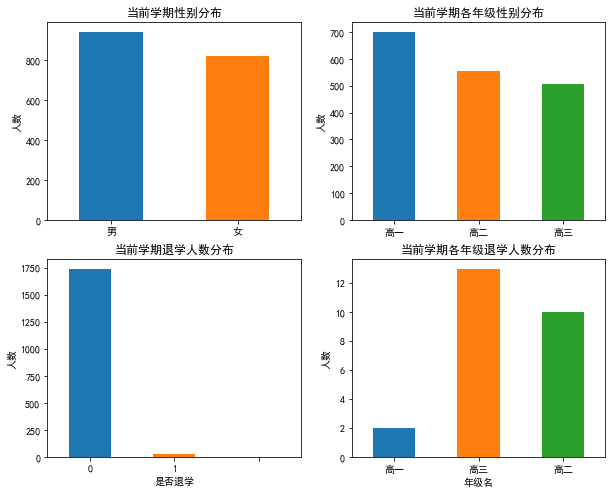

In [14]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(10,8))
fig.set(alpha=0.2)

 # 在一张大图里分别分列几个小图
plt.subplot(2,2,1) # 要生成两行两列，这是第一个图plt.subplot('行','列','编号')
student_info['性别'].value_counts().plot(kind='bar')
plt.title(u'当前学期性别分布')
plt.ylabel('人数')
plt.xticks(rotation=0)


plt.subplot(2,2,2) #这是第二个图
student_info['年级名'].value_counts().plot(kind='bar')
plt.title('当前学期各年级性别分布')
plt.ylabel('人数')
# plt.legend()标签
plt.xticks(rotation=0)

plt.subplot(2,2,3) #这是第三个图
# student_info['是否退学'].value_counts().plot(kind='bar')
student_info['是否退学'].fillna(value='0').value_counts().plot(kind='bar') #将NaN替换为0
plt.title('当前学期退学人数分布')
plt.xlabel('是否退学')
plt.ylabel('人数')
plt.xticks(rotation=0)
#plt.grid(True)# 是否添加网格


plt.subplot(2,2,4) #这是第四个图
po=student_info.ix[student_info['是否退学']=='1'] # 筛选出退学的学生
po.groupby(['年级名'])['学生id'].count().plot(kind='bar')
# po.groupby('年级名')['学生id'].sort_values(by="学生id",ascending=False).reset_index().plot(kind='bar')
# student_info.ix[student_info['是否退学']=='1'].groupby([student_info['年级名']]).plot(kind='bar')
plt.title('当前学期各年级退学人数分布')
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.show()

##### 从学生分布图中可知：2018-2019年第1个学期中，人数：高三＜高二<高一；男女人数大致相等

下面是Windows的字体对应名称，Follow your heart, 各种换！
黑体	SimHei
微软雅黑	Microsoft YaHei
微软正黑体	Microsoft JhengHei
新宋体	NSimSun
新细明体	PMingLiU
细明体	MingLiU
标楷体	DFKai-SB
仿宋	FangSong
楷体	KaiTi
仿宋_GB2312	FangSong_GB2312
楷体_GB2312	KaiTi_GB2312

### 层次化索引的可视化

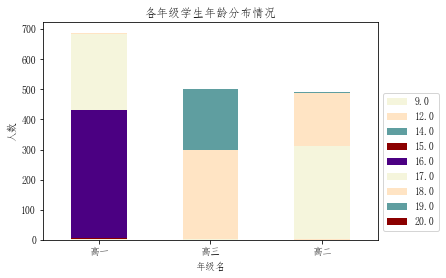

In [10]:
student_info['年龄']=2019-student_info['出生日期']
bp=student_info.groupby(['年级名','年龄'])['学生id'].count().unstack()
bp.plot(kind='bar',stacked=True,color=['beige','bisque','cadetblue','darkred','indigo']) # 进行堆叠
plt.title(u'各年级学生年龄分布情况')
plt.ylabel('人数')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xticks(rotation=0)
plt.show()

In [11]:
sex_table=student_info.groupby(['年级名','性别']).count()
sex_table#是一个dataframe

学生id  学生姓名   民族  出生日期  班级名  家庭住址  家庭类型  政治面貌  班级id  班级学期  是否住校  是否退学  \
年级名 性别                                                                         
高一  女    282   282  282   277  282   271   282   282   282   282   137     0   
    男    420   420  420   411  420   401   420   420   420   420   305     2   
高三  女    271   271  271   268  271   265   271   271   271   271    36     6   
    男    237   237  237   234  237   233   237   237   237   237    49     8   
高二  女    269   269  269   240  269   231   269   269   269   269    57     4   
    男    286   286  286   252  286   239   286   286   286   286   124     6   

        宿舍号   年龄  
年级名 性别            
高一  女   137  277  
    男   305  411  
高三  女    36  268  
    男    49  234  
高二  女    57  240  
    男   124  252

In [12]:
# 从层次化索引中取出其中的任意一列
sex_class_id=sex_table['学生id']
sex_class_id # 是一个series

年级名  性别
高一   女     282
     男     420
高三   女     271
     男     237
高二   女     269
     男     286
Name: 学生id, dtype: int64

In [13]:
# 只要把它的双重索引转化为xy索引的dataframe，就可以画出需要的图了
sex_class_id.unstack()#stack:堆叠，堆积；unstack():不要堆叠
# 其实是对dataframe画图

性别,女,男
年级名,,
高一,282,420
高三,271,237
高二,269,286


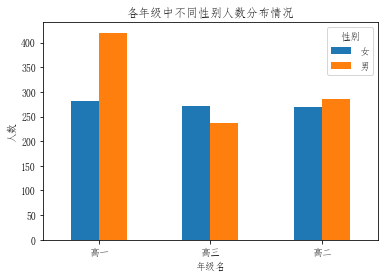

In [14]:
sex_class_id.unstack().plot(kind='bar')
# sex_table=student_info.groupby(['年级名','性别'])['学生id'].count()
plt.xlabel('年级名')
plt.ylabel('人数')
plt.title('各年级中不同性别人数分布情况')
plt.xticks(rotation=0)
plt.show()

pd.pivot_table(data,index=['d1','d2'],values=['x1','x2'],columns=['c1','c2'],aggfunc=[np.sum,np.mean,len],fill_value=0)

sex_table=pd.pivot_table(student_info[['性别','年级名']],index=['年级名'],columns=['性别'],aggfunc=[student_info['学生id'].count],fill_value=0)

sex_table.plot(kind='bar')

使用数据透视表：pivot_table，链接：https://www.cnblogs.com/stream886/p/6022125.html

#### 1.2  学生学业情况描述

In [15]:
# 学生成绩
chengji.columns=['考试id','考试编号','考试编码名称','考试学科id','考试学科名','考试学期','考试类型','考试开始时间','学生id','考试成绩','Z_score','T_score','等第']
# 使用pandas的to_datatime函数转换为标准日期格式
chengji['考试开始时间']=pd.to_datetime(chengji['考试开始时间'])
chengji.head()

,考试id,考试编号,考试编码名称,考试学科id,考试学科名,考试学期,考试类型,考试开始时间,学生id,考试成绩,Z_score,T_score,等第
0,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13539,-2.0,NaN,NaN,NaN
1,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13548,90.0,1.074511,88.59608,0.137615
2,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13551,91.0,1.194145,89.55315,0.091743
3,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13555,-2.0,NaN,NaN,NaN
4,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13559,-2.0,NaN,NaN,NaN


In [16]:
print('学生成绩中学期数量:',chengji['考试学期'].unique())
print('学生成绩中考试数量',chengji['考试编号'].unique().shape[0])

学生成绩中学期数量: ['2017-2018-1' '2016-2017-2' '2014-2015-1' '2015-2016-1' '2014-2015-2'
 '2017-2018-2' '2018-2019-1' '2013-2014-1' '2013-2014-2' '2015-2016-2'
 '2016-2017-1']
学生成绩中考试数量 86


学生成绩表中的学期数量有11个，从2013年到2019年,总共有86个考试

In [17]:
# 第一种表达方式：统计各个学期中作弊、缺考、免考的学生数量分布
special1=chengji.ix[chengji['考试成绩']==-1]
special2=chengji.ix[chengji['考试成绩']==-2]
special3=chengji.ix[chengji['考试成绩']==-3]
special=pd.concat([special1,special2,special3],axis=0)
special.head()
# 第二种表达方式：在多个逻辑条件下，用& 或者|，
# chengji.ix[(chengji['考试成绩']==-1)|(chengji['考试成绩']==-2)|(chengji['考试成绩']==-3)]

,考试id,考试编号,考试编码名称,考试学科id,考试学科名,考试学期,考试类型,考试开始时间,学生id,考试成绩,Z_score,T_score,等第
26632,136947,284,2017学年度第一学期期中考试,2.0,数学,2017-2018-1,2,2017-11-15,13956,-1.0,NaN,NaN,NaN
26667,136947,284,2017学年度第一学期期中考试,2.0,数学,2017-2018-1,2,2017-11-15,14295,-1.0,NaN,NaN,NaN
229324,120036,222,2013-2014年第一学期期末考试,1.0,语文,2013-2014-1,3,2014-01-18,11055,-1.0,NaN,NaN,NaN
316188,127884,252,2015学年第一学期期末考查课总评,9.0,体育,2015-2016-1,5,2016-01-12,11973,-1.0,NaN,NaN,NaN
383944,129064,253,2015学年第一学期期末考试,5.0,化学,2015-2016-1,3,2016-01-23,12232,-1.0,NaN,NaN,NaN


<Figure size 720x720 with 0 Axes>

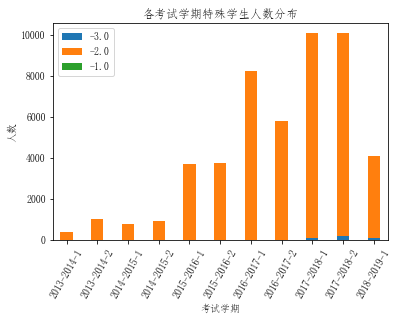

In [18]:
plt.figure(figsize=(10,10))
test=special.groupby(['考试学期','考试成绩'])['学生id'].count()
test=test.unstack().plot(kind='bar',width=0.4,stacked=True) # 设置柱子的宽度
plt.xticks(color='black',rotation=60) # 对x轴坐标设置颜色以及倾斜度
plt.xlabel('考试学期')
plt.ylabel('人数')
plt.title('各考试学期特殊学生人数分布')
plt.legend()
plt.show()

##### 考试成绩(-1为作弊，-2为缺考，-3为免考)；从上图可知：去年缺考的人数是最多的。

‘line’：折线图
‘bar’ :条形图
‘barh’：横向条形图
‘hist’：柱状图
‘box’ ：箱线图
‘kde’ :密度估计图，主要对柱状图添加Kernel 概率密度线
‘area’ : 面积图
‘pie’ : 饼图
‘scatter’：散点图

<Figure size 6480x6480 with 0 Axes>

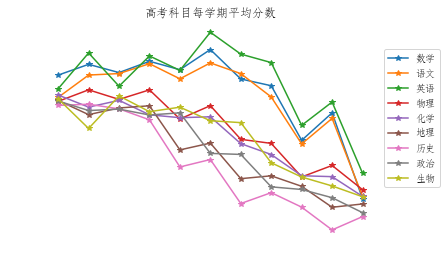

In [19]:
# 删除成绩表中的特殊情况
# 按列条件筛选、删除DataFrame的整行     data.name.isin([筛选元素])  https://blog.csdn.net/shuihupo/article/details/82842524
# 对dataframe的某列（name为列名）进行筛选，加负号的原因是想删除符合条件的行，不写负号是筛选出符合条件的行
score=chengji[-chengji['考试成绩'].isin(special['考试成绩'])]

# 汇总各科成绩变化趋势
score1=chengji.groupby(['考试学科名','考试学期'])['考试成绩'].mean().unstack().T

# 选取score中常见科目（选择列）
score1=pd.DataFrame(score1,columns=['数学','语文','英语','物理','化学','地理','历史','政治','生物'])

fig=plt.figure(figsize=(90,90))
fig.set(alpha=0.2)
score1.plot(kind='line',marker = "*")
plt.title('高考科目每学期平均分数')
plt.legend(bbox_to_anchor=(1.2, 0.9))#bbox_to_anchor：表示legend的位置，前一个表示左右，后一个表示上下
# plt.grid(True)
plt.xticks([])  #去掉刻度的方法
plt.axis('off') # 关闭坐标轴
plt.ylabel('平均分数')
plt.show()

##### 从上图中可以看出：高考科目的平均分数在逐年下降，应该加强对学生的教育

### 层级索引：最大的作用在于能够将超过二维的数据结构转化为等价的DataFrame

1、使用unstack()方法可以将层次索引的数据结构转化为一个普通的DataFrame,stack()方法作用相反

2、多级索引的取值和切片：iloc索引器；使用loc索引器

3、根据级别汇总统计 dataframe.sum(level='key')

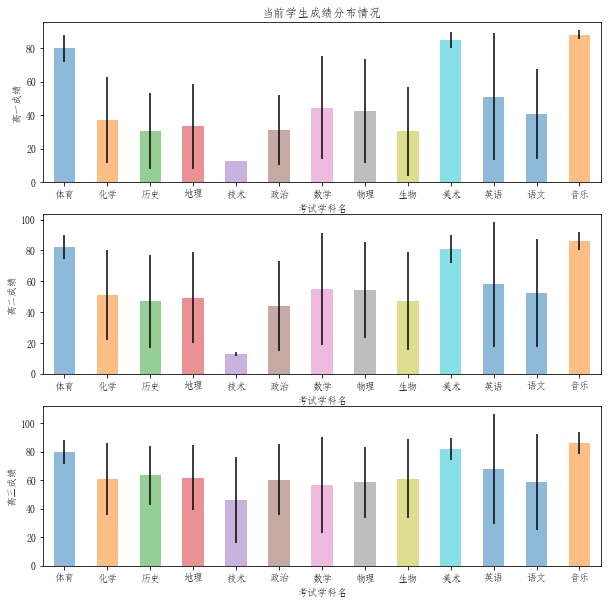

In [20]:
# 合并学生成绩和当前学生信息(当前学生学习情况)
current=pd.merge(score,student_info,on='学生id')
cur_score=current.groupby(['年级名','考试学科名'])['考试成绩'].agg(['mean','std'])# count:非NA的数量；mean：非NA的平均值；std:标准差
cur_score.unstack()

fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)

plt.subplot(3,1,1)
gao1=cur_score.loc['高一'].unstack()
std1=gao1.loc['std']
gao1.loc['mean'].plot(kind='bar',yerr=std1 ,align='center',width=0.5,alpha=0.5)
plt.title('当前学生成绩分布情况')
plt.ylabel('高一成绩')
plt.xticks(rotation=0)

plt.subplot(3,1,2)
gao2=cur_score.loc['高二'].unstack()
std2=gao2.loc['std']
gao2.loc['mean'].plot(kind='bar',yerr=std2 ,align='center',width=0.5,alpha=0.5)
# plt.title('当前高二学生成绩分布情况')
plt.ylabel('高二成绩')
plt.xticks(rotation=0)



plt.subplot(3,1,3)
gao3=cur_score.loc['高三'].unstack()
std3=gao3.loc['std']
gao3.loc['mean'].plot(kind='bar',yerr=std3 ,align='center',width=0.5,alpha=0.5)
plt.ylabel('高三成绩')
plt.xticks(rotation=0)

plt.show()

In [21]:
cur_score.index # 查看groupby后的行索引

MultiIndex(levels=[['高一', '高三', '高二'], ['体育', '化学', '历史', '地理', '技术', '政治', '数学', '物理', '生物', '美术', '英语', '语文', '音乐']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           names=['年级名', '考试学科名'])

##### 上面有层级标签（这里两列），label标签（分类、位置）

#### 1.3 学生消费情况描述

In [10]:
consumption.dtypes
# object是文本类型

消费时间     object
消费金额    float64
学生id      int64
姓名       object
性别       object
dtype: object

In [24]:
# 考勤类型
kaoqin.columns=['考勤id','学期','日期','考勤id','考勤名称','考勤任务id','学生id','学生姓名','班级名','班级id']
kaoqin.head()

,考勤id,学期,日期,考勤id,考勤名称,考勤任务id,学生id,学生姓名,班级名,班级id
0,134324,2017-2018-1,2018/1/27 12:21:32,99003,早退[移动考勤机],9900300,13893,陈某某,高三(11),872
1,134346,2017-2018-1,2018/1/27 12:41:44,99003,早退[移动考勤机],9900300,13667,宋某某,高三(11),872
2,134367,2017-2018-1,2018/1/27 14:13:37,99003,早退[移动考勤机],9900300,13925,李某某,高三(09),879
3,134263,2017-2018-1,2018/1/27 11:18:03,99003,早退[移动考勤机],9900300,13774,张某某,高三(09),879
4,134480,2017-2018-1,2018/1/27 14:42:03,99002,校服[移动考勤机],9900200,13774,张某某,高三(09),879


In [8]:
exam_type.columns=['考试类型id','考试类型名称']
exam_type.head()

,考试类型id,考试类型名称
0,2,期中
1,3,期末
2,4,平时(总评用)
3,5,总评
4,6,五校联考


In [8]:
import datetime
datetime.datetime(2018, 7, 5, 10, 20)

datetime.datetime(2018, 7, 5, 10, 20)

In [10]:
from datetime import datetime
 
now = datetime.now()
print (now.month)
print (now.year)
print (now.day)
print (str(now.year)+ '/' + str(now.month) + '/' + str(now.day) ,str(now.hour) +':'+ str(now.minute) + ':' + str(now.second))

3
2019
6
2019/3/6 13:24:19
